# Part 2: Rosenblatt's Algorithm

In [331]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [332]:
boston=load_boston()

In [333]:
df=pd.DataFrame(boston.data, columns=boston['feature_names'])
df['MEDV']=boston.target
df['highPriced']=df.MEDV>40

Text(0, 0.5, 'RM')

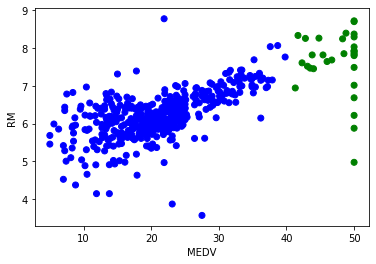

In [334]:
plt.scatter(df['MEDV'],df['RM'],c=df.highPriced.map({True:'green',False:'blue'}))
plt.xlabel('MEDV')
plt.ylabel('RM')

I can see the the scattered points are showing two clusters in different colors as MEDV=40 is the boundary.

In [335]:
X=np.ones((len(df),3))
X[:,1:]=df[['RM','MEDV']].values
y=df['highPriced'].values
y=np.multiply(y, 1)

In [336]:
print (X.shape, "   ", y.shape)

(506, 3)     (506,)


In [337]:
# check the first 5 lines of X
X[:5]

array([[ 1.   ,  6.575, 24.   ],
       [ 1.   ,  6.421, 21.6  ],
       [ 1.   ,  7.185, 34.7  ],
       [ 1.   ,  6.998, 33.4  ],
       [ 1.   ,  7.147, 36.2  ]])

In [338]:
# set up step and weights
step=0.1
weights=np.random.rand(X.shape[1])
step, weights

(0.1, array([0.23056954, 0.04707975, 0.39734095]))

In [339]:
def myPerceptron(weights, step, X, y):    
    w = X @ weights
    yhat=np.where(w>40,1,0)    
    diff=y-yhat    
    weights+=step*diff@X
    #for xi, error in zip(X,diff):
     #   weight_update=step*error
      #  weights[1:]+=weight_update * xi
       # weights[0]+=weight_update
        #if error!=0:
         #   weights+=step*error*xi
    errors=np.count_nonzero(y-yhat)
    return weights, errors

In [340]:
errors=1
Error=[]
IterationNo=[]
iteration=0
while errors>0:    
    weights,errors=myPerceptron(weights, step, X, y)
    Error.append(errors)    
    iteration+=1
    IterationNo.append(iteration)
print(iteration)

31234


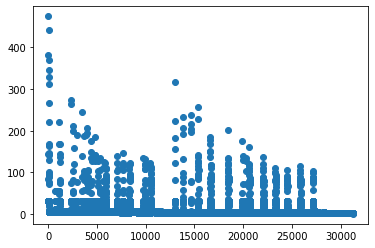

In [341]:
plt.scatter(IterationNo,Error)

I don't think the plot generated by the gradient descent would be similar to the plot above. Because we only have one layer now, the outcome is affected only by the three weights. Once changed, even slightly changed, the outcome would be quite different. While for multi-layer, it is more complicated and more weights are controlled. So I suppose the plot would be more smooth than the plot above.

In [342]:
weights

array([-3274.26943046,  -370.17652025,   154.36734095])

Text(0, 0.5, 'RM')

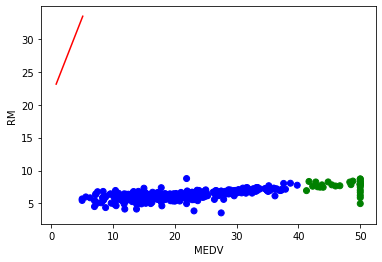

In [343]:
xForPlot=np.arange(0.8,5.2,0.1)
x = xForPlot
y=-(weights[0]+weights[1]*x)/weights[2]
plt.plot(x,y,'-r')
plt.scatter(df['MEDV'],df['RM'],c=df.highPriced.map({True:'green',False:'blue'}))
plt.xlabel('MEDV')
plt.ylabel('RM')

# part 3 out-of-the-box neural networks

In [344]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [345]:
xtrain, xtest, ytrain, ytest = train_test_split(df.drop(['highPriced'],axis=1), df.MEDV, test_size = 0.2)

In [346]:
print(xtrain.shape,xtest.shape)

(404, 14) (102, 14)


In [347]:
from sklearn.neural_network import MLPRegressor

In [348]:
def myFunc(size,xtrain,ytrain):
    regressor=MLPRegressor(hidden_layer_sizes=size,max_iter=1000)
    regressor.fit(xtrain,ytrain)
    pred_y_train = regressor.predict(xtrain)
    #errors=np.count_nonzero(ytrain-pred_y_train)/len(ytrain)
    print ('Accuracy Score:',accuracy_score(ytrain, pred_y_train))
    #return errors

In [351]:
sizes=[2, 5, 10, 20, 50]
for size in sizes:
    regressor=MLPRegressor(hidden_layer_sizes=size,max_iter=1000)
    regressor.fit(xtrain,ytrain)
    pred_y_train = regressor.predict(xtrain)
    pred_y_test = regressor.predict(xtest)
    print('hidden layer size:', size)
    #absolute percent error
    print ('TRAIN error Score:',np.mean(abs(ytrain-pred_y_train)/ytrain))
    print ('TEST error Score:',np.mean(abs(ytest-pred_y_test)/ytest))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


hidden layer size: 2
TRAIN error Score: 0.4165462493849888
TEST error Score: 0.4052059589363809


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


hidden layer size: 5
TRAIN error Score: 0.15536917202890424
TEST error Score: 0.1840523314490723


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


hidden layer size: 10
TRAIN error Score: 0.09287237127262093
TEST error Score: 0.1195729636339505
hidden layer size: 20
TRAIN error Score: 0.05956582485868746
TEST error Score: 0.06524545511074963
hidden layer size: 50
TRAIN error Score: 0.055403312164560736
TEST error Score: 0.06124924789470381


The result is not seemingly linear. It does not mean more layers more accurate. When there are 5 layers, the error is lower than when there are 2 or 10 or 20 layers. (I have run the code for several times, every time I got totally different results.)

In [350]:
sizes=[(2, 2), (5, 5), (10, 10), (20, 20), (50, 50)]
for size in sizes:
    regressor=MLPRegressor(hidden_layer_sizes=size,max_iter=1000)
    regressor.fit(xtrain,ytrain)
    pred_y_train = regressor.predict(xtrain)
    pred_y_test = regressor.predict(xtest)
    print('hidden layer size:', size)
    #absolute percent error
    print ('TRAIN error Score:',np.mean(abs(ytrain-pred_y_train)/ytrain))
    print ('TEST error Score:',np.mean(abs(ytest-pred_y_test)/ytest))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


hidden layer size: (2, 2)
TRAIN error Score: 0.8429767839572107
TEST error Score: 0.8356846104137121
hidden layer size: (5, 5)
TRAIN error Score: 0.07656349409020669
TEST error Score: 0.07960197187578846
hidden layer size: (10, 10)
TRAIN error Score: 0.08060135535860205
TEST error Score: 0.07892849360860332
hidden layer size: (20, 20)
TRAIN error Score: 0.07577855631905447
TEST error Score: 0.07843311353700731
hidden layer size: (50, 50)
TRAIN error Score: 0.0971911190050903
TEST error Score: 0.09975348978957535


2D is different from above?

I'm confused about the totally different results I get every time. So I enlarged the max iteration number as I noticed in the warning that the maximum iterations reached but the optimization has'nt converged yet. Then we have results below:

In [353]:
sizes=[2, 5, 10, 20, 50]
for size in sizes:
    regressor=MLPRegressor(hidden_layer_sizes=size,max_iter=5000)
    regressor.fit(xtrain,ytrain)
    pred_y_train = regressor.predict(xtrain)
    pred_y_test = regressor.predict(xtest)
    print('hidden layer size:', size)
    #absolute percent error
    print ('TRAIN error Score:',np.mean(abs(ytrain-pred_y_train)/ytrain))
    print ('TEST error Score:',np.mean(abs(ytest-pred_y_test)/ytest))


hidden layer size: 2
TRAIN error Score: 0.42265840116408737
TEST error Score: 0.41936766821943633
hidden layer size: 5
TRAIN error Score: 0.020429733554865947
TEST error Score: 0.019659597980754385
hidden layer size: 10
TRAIN error Score: 0.19487796949922953
TEST error Score: 0.19816571081498519
hidden layer size: 20
TRAIN error Score: 0.08150028807356605
TEST error Score: 0.09224482169658517
hidden layer size: 50
TRAIN error Score: 0.06700316841553439
TEST error Score: 0.07843920567524218


In [357]:
sizes=[(2, 2), (5, 5), (10, 10), (20, 20), (50, 50)]
for size in sizes:
    regressor=MLPRegressor(hidden_layer_sizes=size,max_iter=10000)
    regressor.fit(xtrain,ytrain)
    pred_y_train = regressor.predict(xtrain)
    pred_y_test = regressor.predict(xtest)
    print('hidden layer size:', size)
    #absolute percent error
    print ('TRAIN error Score:',np.mean(abs(ytrain-pred_y_train)/ytrain))
    print ('TEST error Score:',np.mean(abs(ytest-pred_y_test)/ytest))


hidden layer size: (2, 2)
TRAIN error Score: 0.049079639314306776
TEST error Score: 0.05531208047008856
hidden layer size: (5, 5)
TRAIN error Score: 0.20094074010681803
TEST error Score: 0.20886981106083216
hidden layer size: (10, 10)
TRAIN error Score: 0.10509491966502207
TEST error Score: 0.12853480951567373
hidden layer size: (20, 20)
TRAIN error Score: 0.06752129460022557
TEST error Score: 0.07461430465679293
hidden layer size: (50, 50)
TRAIN error Score: 0.04218032311386552
TEST error Score: 0.042315046914658566


I suppose max_iter 10000 would satisfy most of the number of hidden layer sizes. So I define a function to make the process simplier.

In [358]:
def fit(sizes):
    for size in sizes:
        regressor=MLPRegressor(hidden_layer_sizes=size,max_iter=10000)
        regressor.fit(xtrain,ytrain)
        pred_y_train = regressor.predict(xtrain)
        pred_y_test = regressor.predict(xtest)
        print('hidden layer size:', size)
        #absolute percent error
        print ('TRAIN error Score:',np.mean(abs(ytrain-pred_y_train)/ytrain))
        print ('TEST error Score:',np.mean(abs(ytest-pred_y_test)/ytest))


try different magnitude

In [359]:
sizes=[3,30,300,3000]
fit(sizes)

hidden layer size: 3
TRAIN error Score: 0.13126615327826602
TEST error Score: 0.13919471906050818
hidden layer size: 30
TRAIN error Score: 0.09747489955009084
TEST error Score: 0.11532324743730321
hidden layer size: 300
TRAIN error Score: 0.052598414995862416
TEST error Score: 0.052535645473544404
hidden layer size: 3000
TRAIN error Score: 0.03464820480367977
TEST error Score: 0.03136258046886348


try 2 D

In [365]:
sizes=[(2,2),(50,50),(100,100),(1000,1000)]
fit(sizes)

hidden layer size: (2, 2)
TRAIN error Score: 0.37168686156423436
TEST error Score: 0.40815305396849355
hidden layer size: (50, 50)
TRAIN error Score: 0.08928261965722611
TEST error Score: 0.09745551103370788
hidden layer size: (100, 100)
TRAIN error Score: 0.053167230778528814
TEST error Score: 0.058265557134379385
hidden layer size: (1000, 1000)
TRAIN error Score: 0.12540781917896424
TEST error Score: 0.14089180241537425


try mixed 1D and 2D

In [364]:
sizes=[1,(1,1),5,(5,5),50,(50,50)]
fit(sizes)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


hidden layer size: 1
TRAIN error Score: 0.10418888177112423
TEST error Score: 0.08224899719173945
hidden layer size: (1, 1)
TRAIN error Score: 0.35639623408762816
TEST error Score: 0.3480579689604004
hidden layer size: 5
TRAIN error Score: 0.030535675608520337
TEST error Score: 0.03238944855407465
hidden layer size: (5, 5)
TRAIN error Score: 0.19953712845939142
TEST error Score: 0.23041608054670085
hidden layer size: 50
TRAIN error Score: 0.0724730413881988
TEST error Score: 0.08468455679589922
hidden layer size: (50, 50)
TRAIN error Score: 0.058812171352179816
TEST error Score: 0.060658828147766644


try different number in one 2D cell

In [363]:
sizes=[(1,2),(5,10),(10,100)]
fit(sizes)

hidden layer size: (1, 2)
TRAIN error Score: 0.36132179505811546
TEST error Score: 0.35333393453970674
hidden layer size: (5, 10)
TRAIN error Score: 0.07381989419382959
TEST error Score: 0.08796805342163215
hidden layer size: (10, 100)
TRAIN error Score: 0.10667749330476692
TEST error Score: 0.12277179979120312


I noticed several times that with hidden layer size is 5, the error score is lower than its neighbors.  
the hidden layer sizes with lower error score:
3000, 5, (2,2), (50,50), (100,100)  
the max iter could be around 10000